# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [62]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "/Users/dannyhan/Desktop/Challenge_5_PyBer/Resources/city_data.csv"
ride_data_to_load = "/Users/dannyhan/Desktop/Challenge_5_PyBer/Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [85]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head(15)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


## Deliverable 1: Get a Summary DataFrame 

In [87]:
#  1. Get the total rides for each city type
total_rides_by_type = pyber_data_df.groupby('type').count().ride_id
print(total_rides_by_type)

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64


In [88]:
# 2. Get the total drivers for each city type
total_drivers_by_type = city_data_df.groupby('type').sum().driver_count
print(total_drivers_by_type)

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64


In [89]:
#  3. Get the total amount of fares for each city type
total_fare_by_type = pyber_data_df.groupby('type').sum().fare
print(total_fare_by_type)

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64


In [90]:
#  4. Get the average fare per ride for each city type. 
avg_fare_per_ride_type = total_fare_by_type / total_rides_by_type
print(avg_fare_per_ride_type)

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64


In [104]:
# 5. Get the average fare per driver for each city type. 
avg_fare_per_driver_type = total_fare_by_type /total_drivers_by_type
print(avg_fare_per_driver_type)

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64


In [134]:
city_type = pyber_data_df.groupby('type').type.unique()
city_type

type
Rural          [Rural]
Suburban    [Suburban]
Urban          [Urban]
Name: type, dtype: object

In [135]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({
            "City Types": city_type,
            "Total Rides": total_rides_by_type,
            "Total Drivers": total_drivers_by_type,
            "Total Fares": total_fare_by_type,
            "Average Fare per Ride": avg_fare_per_ride_type,
            "Average Fare per Driver": avg_fare_per_driver_type})

pyber_summary_df.set_index("City Types", inplace = True)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
City Types,,,,,
[Rural],125,78,4327.93,34.623440,55.486282
[Suburban],625,490,19356.33,30.970128,39.502714
[Urban],1625,2405,39854.38,24.525772,16.571468


In [136]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [137]:
#  8. Format the columns.
pyber_summary_df['Total Rides'] = pyber_summary_df['Total Rides'].map('{:,}'.format)
pyber_summary_df['Total Drivers'] = pyber_summary_df['Total Drivers'].map('{:,}'.format)
pyber_summary_df['Total Fares'] = pyber_summary_df['Total Fares'].map('${:,.2f}'.format)
pyber_summary_df['Average Fare per Ride'] = pyber_summary_df['Average Fare per Ride'].map('${:,.2f}'.format)
pyber_summary_df['Average Fare per Driver'] = pyber_summary_df['Average Fare per Driver'].map('${:,.2f}'.format)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
[Rural],125,78,"$4,327.93",$34.62,$55.49
[Suburban],625,490,"$19,356.33",$30.97,$39.50
[Urban],"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [138]:
# 1. Read the merged DataFrame
pyber_data_df.head(5)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [139]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
fare_sum_type_date = pyber_data_df.groupby(['type', 'date']).sum().fare
fare_sum_type_date

type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
                              ...  
Urban  2019-05-08 04:20:00    21.99
       2019-05-08 04:39:49    18.45
       2019-05-08 07:29:01    18.55
       2019-05-08 11:38:35    19.77
       2019-05-08 13:10:18    18.04
Name: fare, Length: 2375, dtype: float64

In [140]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
fare_sum_type_date = fare_sum_type_date.reset_index()


In [141]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
fare_sum_type_date = fare_sum_type_date.pivot(index='date',columns='type', values='fare')
fare_sum_type_date.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [142]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
new_fare_df = fare_sum_type_date.loc['2019-01-01':'2019-04-29']

In [143]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
new_fare_df.index = pd.to_datetime(new_fare_df.index)


In [144]:
# 7. Check that the datatype for the index is datetime using df.info()
new_fare_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [145]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
sum_fares_each_week = new_fare_df.resample('W').sum()
sum_fares_each_week.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


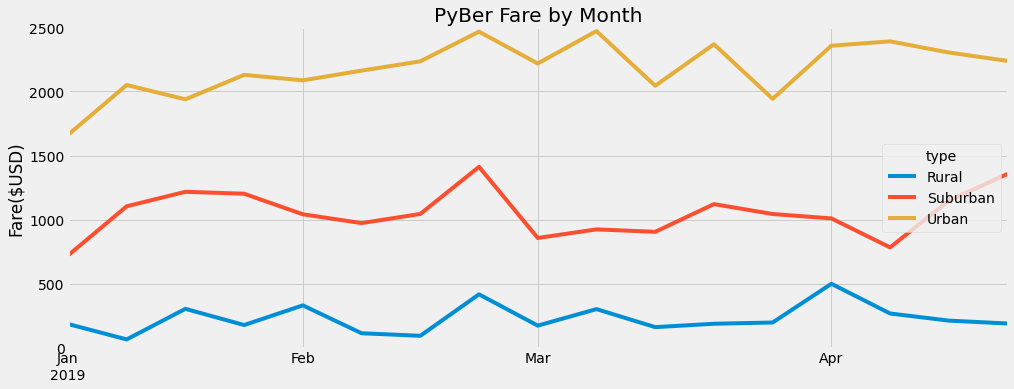

In [146]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
sum_fares_each_week.plot(figsize=(15, 5.5))

# Create labels for the x and y axes.
plt.xlabel("")
plt.ylabel("Fare($USD)")
# Set the y limit between 0 and 45.
plt.ylim(0, 2500)
# Create a title.
plt.title("PyBer Fare by Month")


# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

